In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
%matplotlib inline

In [40]:
rc('font', family='Comic Sans MS')
matematyczne=pd.read_csv('dlugosc50cm.csv')
roznicowe=pd.read_csv('kat15stopni.csv')
stopien = np.pi/180
D_phi_miarka = stopien
D_phi_eksp = stopien*4
D_phi = np.sqrt((D_phi_miarka**2)/3 + (D_phi_eksp**2)/3)
dlugosc = 50e-2
phi=15*stopien
D_dlugosc = 0.5
D_czas = 1e-4
matematyczne_kat = np.arange(10,41,10, dtype=float)
roznicowe_lina = np.arange(0,51,10, dtype=float)
roznicowe_lina[0] = 1.5
g = 9.81

In [22]:
print(matematyczne.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      10 &      20 &      30 &      40 \\
\midrule
0 &  4.9223 &  5.7827 &  5.7889 &  5.8451 \\
1 &  5.6868 &  5.7221 &  5.7733 &  5.8451 \\
2 &  4.9163 &  5.7227 &  5.7745 &  5.8525 \\
3 &  5.6908 &  5.7202 &  5.7716 &  5.8456 \\
4 &  4.9222 &  5.7210 &  5.7750 &  5.8459 \\
\bottomrule
\end{tabular}



In [4]:
print(roznicowe.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &      50 &      40 &      30 &      20 &      10 &     1.5 \\
\midrule
0 &  1.2158 &  1.3703 &  1.5107 &  1.6406 &  1.7587 &  1.8516 \\
1 &  1.2122 &  1.3690 &  1.5121 &  1.6403 &  1.7599 &  1.8525 \\
2 &  1.2103 &  1.3705 &  1.5118 &  1.6403 &  1.7605 &  1.8518 \\
3 &  1.2121 &  1.3703 &  1.5124 &  1.6402 &  1.7597 &  1.8516 \\
4 &  1.2126 &  1.3706 &  1.5124 &  1.6408 &  1.7599 &  1.8518 \\
5 &  1.2136 &  1.3704 &  1.5120 &  1.6400 &  1.7605 &  1.8523 \\
\bottomrule
\end{tabular}



In [5]:
def ciag_przyblizen(fi):
    le_sin = np.sin(fi/2)
    return 1 + 1/4*le_sin**2 + 9/64*le_sin**4 + 225/2304*le_sin**6
def matematyczne_okres(fi):
#     return ciag_przyblizen(fi)
    return 2*(np.pi)*np.sqrt(dlugosc/g)*ciag_przyblizen(fi)

In [30]:
D_matematyczne = np.sqrt(matematyczne.std(0)**2+(D_czas**2)/3)

In [7]:
matematyczne.mean(0)/matematyczne_okres(matematyczne_kat)

10    0.646681
20    0.928077
30    0.894435
40    0.756247
dtype: float64

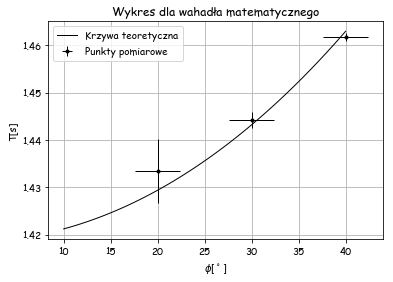

In [47]:
matematyczne_pelnia = np.linspace(10*stopien,40*stopien)
plt.errorbar(matematyczne_kat[1:],matematyczne.mean(0)[1:]/4,D_matematyczne[1:]/4,D_phi/stopien,'k.', label="Punkty pomiarowe",lw=1)
plt.plot(matematyczne_pelnia/stopien,matematyczne_okres(matematyczne_pelnia),'k', label="Krzywa teoretyczna",lw=1)
# plt.plot((matematyczne_pelnia+D_phi)/stopien,matematyczne_okres(matematyczne_pelnia+D_phi),'--k', \
#          label="Granice niepewności krzywej teoretycznej",lw=1)
# plt.plot((matematyczne_pelnia-D_phi)/stopien,matematyczne_okres(matematyczne_pelnia-D_phi),'--k',lw=1)
plt.ylabel('T[s]')
plt.xlabel(r'$\phi[^\circ]$')
plt.title('Wykres dla wahadła matematycznego')
plt.grid()
plt.legend(loc='best')
plt.savefig('Wykres_matematyczne.eps')

In [37]:
D_phi/stopien

1.2909944487358054

In [9]:
roznicowe_reshaped = roznicowe.mean(0).values.reshape(roznicowe.mean(0).size, 1)
roznicowe_roznice = roznicowe_reshaped.T**2 - roznicowe_reshaped**2
roznicowe_wykres = np.triu(roznicowe_roznice).flatten()
roznicowe_lina_reshaped = roznicowe_lina.reshape(roznicowe_lina.size, 1)
roznicowe_lina_roznice = roznicowe_lina_reshaped.T - roznicowe_lina_reshaped
roznicowe_lina_wykres = np.triu(roznicowe_lina_roznice).flatten()
tutaj_sa_zera = roznicowe_lina_wykres == 0
roznicowe_lina_wykres = roznicowe_lina_wykres[~tutaj_sa_zera]/100
roznicowe_wykres = roznicowe_wykres[~tutaj_sa_zera]

In [10]:
D_roznicowe_reshaped = roznicowe.std(0).values.reshape(roznicowe.std(0).size,1)
D_roznicowe2 = D_roznicowe_reshaped**2+(1e-3**2)/3
D_roznicowe_roznice = D_roznicowe2.T + D_roznicowe2
D_roznicowe_wykres = np.triu(D_roznicowe_roznice).flatten()
D_roznicowe_wykres = D_roznicowe_wykres[~tutaj_sa_zera]
D_roznicowe_lina = np.sqrt((D_dlugosc)**2/3 + (D_dlugosc/2)**2/3)
D_roznicowe_lina_wykres = D_roznicowe_lina*2

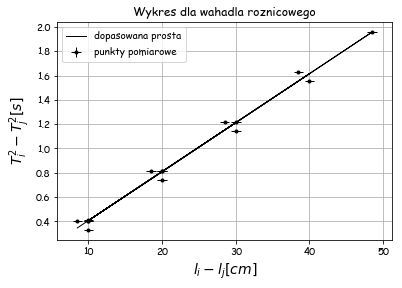

In [11]:
plt.errorbar(roznicowe_lina_wykres*100,roznicowe_wykres,D_roznicowe_wykres,D_roznicowe_lina_wykres,'k.',label='punkty pomiarowe',lw=1)
grawitacyjna, D_grawitacyjna = np.polyfit(roznicowe_lina_wykres*100,roznicowe_wykres,1,cov=True)
plt.plot(roznicowe_lina_wykres*100,np.polyval(grawitacyjna,roznicowe_lina_wykres*100),'k',label='dopasowana prosta',lw=1)
roznicowe_lina_wykres.size
plt.xlabel(r'$l_i-l_j[cm]$', fontsize=14)
plt.ylabel(r'$T^2_i-T^2_j[s]$', fontsize=14)
plt.title('Wykres dla wahadla roznicowego')
plt.grid()
plt.legend(loc='best')
plt.savefig('Wykres_roznicowe.eps')

In [12]:
Dataframe = pd.DataFrame()
Dataframe[r'l[cm]'] = roznicowe_lina
Dataframe[r'$\Delta$l[cm]'] = D_dlugosc
Dataframe[r]

NameError: name 'r' is not defined

In [ ]:
grawitacja = 4*np.pi**2*ciag_przyblizen(15*stopien)/grawitacyjna[0]
D_grawitacja = np.sqrt((1e-3*grawitacja/ciag_przyblizen(15*stopien))**2+\
                       (np.sqrt(D_grawitacyjna[0,0])*grawitacja/grawitacyjna[0])**2)
print(f'g = {grawitacja:.3f} +/- {D_grawitacja:.3f}')